# <center> 스토어 카메라 인스타그램 크롤러</center>
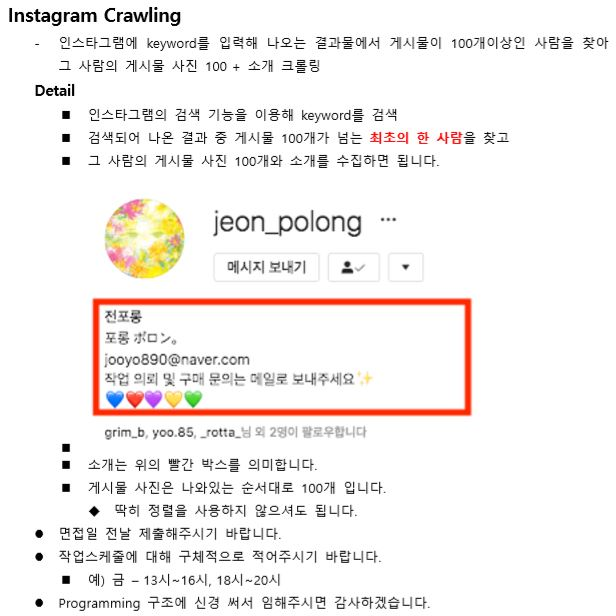

<h3>def insta_login(userid, userpw):</h3>
- 인스타그램 페이지를 열고 로그인 페이지를 클릭하고 로그인 하는 모듈<br>
- userid : 로그인할 아이디 <br>
- userpw : 로그인할 아이디의 패스워드

<h3>def find_keyword(keyword):</h3>
- 인스타그램 내에서 검색하는 모듈<br>
- keyword : 검색할 내용 <br>
- return : 검색어의 포스트수를 반환

<h3>def find_name(value, first):</h3>
- 검색된 사진의 사람 (=포스팅한 사람)의 이름을 가지고 오는 모듈<br>
- value : 지정한 숫자만큼 가져온다<br>
- retry : 첫번째인지(0) 아닌지(int)<br>
- return : 포스팅한 사람의 이름을 반환

<h3>def post_condiction_finder(find_list, condiction):</h3>
- 조건에 맞는 사람(게시글수 100개 이상)을 찾기위한 모듈<br>
- find_list : find_name에서 찾은 리스트<br>
- condiction : 조건 (게시물이 100개 이상이면 100으로 설정<br>
- return : 조건에 부합된 사람, 없다면 0을 반환

<h3>def image_collector(name, value):</h3>
- 조건에 부합한 사람의 사진을 크롤링하기 위한 모듈<br>
- name : 가져올 유저의 아이디<br>
- value : 가져올 사진의 수

<h3>def insta_introduce(name):</h3>
- 조건에 부합한 사람의 소개를 크롤링하기 위한 모듈<br>
- name : 가져올 유저의 아이디


## 인스타그램 로그인

In [1]:
from selenium import webdriver #크롬조종
import time  #딜레이
from selenium.webdriver.common.keys import Keys #키보드입력
from collections import OrderedDict  #중복제거
from itertools import repeat
import os  #경로설정
import getpass 
    
def insta_login(userid, userpw):
    print("   로그인 시작   ")
    #ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ로그인ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
    #셀레니움은 로그인과 같은 절차가 필요하거나 스크롤 다운과 같은 행동이 필요할 때 
    #즉 그렇기에 기다려주는 시간이 필요하다. (너무 빠르다면 적용되지 않을수 있다.)
    
    #페이지 띄우기
    driver.get('https://instagram.com')
    
    driver.find_element_by_xpath("//*[@id='react-root']/section/main/article/div[2]/div[2]/p/a").click()
    
    #텍스트 박스를 선택한다 select == send_keys("보낼 내용")
    #d 보내기, 날리기, 쓰기, 입력하기
    driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/article/div/div[1]/div/form/div[2]/div/label/input").send_keys(userid)
    #w 날리기
    driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/article/div/div[1]/div/form/div[3]/div/label/input").send_keys(userpw)
    #로그인 선택하기
    driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/article/div/div[1]/div/form/div[4]/button").click()
    
    time.sleep(1)
    
    driver.find_element_by_xpath("/html/body/div[4]/div/div/div[3]/button[2]").click()
    
    print("   로그인 끝   ")

## 인스타그램 검색

In [2]:
def find_keyword(keyword):
    print("   검색 시작   ")
    
    try:
        #검색어 입력하기(검색어 텍스트 박스를 사용하지 않고 url을 직접 사용)
        driver.find_element_by_xpath("//*[@id='react-root']/section/nav/div[2]/div/div/div[2]/input").send_keys(keyword)
        
        #검색시간 정지
        time.sleep(2)
        driver.find_element_by_xpath("//*[@id='react-root']/section/nav/div[2]/div/div/div[2]/input").send_keys(Keys.ENTER)
        driver.find_element_by_xpath("//*[@id='react-root']/section/nav/div[2]/div/div/div[2]/input").send_keys(Keys.ENTER)
        
        value = int(driver.find_element_by_xpath("//*[@id='react-root']/section/main/header/div[2]/div/div[2]/span/span").text)
    
        return value
    except Exception:
        #검색된 컨텐츠가 바로 사람으로 넘어갈경우
        name = driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/div[1]/h1").text
        value = driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/ul/li[1]/span/span").text
        
        value = name + "|" + value
        
    return value

## 인스타그램 "검색된 사진"의 사람들 검색

In [3]:
#driver.find_element_by_xpath("/html/body/div[4]/button[1]").text
def find_name(value, retry):
    print("   검색된 사람들 검색 시작   ")
    #"인기사진" 탭의 첫번째 사진 클릭
    tmp_id = []

    if retry == 0:
        try:
            driver.find_element_by_xpath("//*[@id='react-root']/section/main/article/div[1]/div/div/div[1]/div[1]").click()
        except Exception:
            #검색창이 켜져있으면 검색을 없애야함
            driver.find_element_by_xpath("//*[@id='react-root']/section/nav/div[2]/div/div/div[2]/div[3]").click()
            driver.find_element_by_xpath("//*[@id='react-root']/section/main/article/div[1]/div/div/div[1]/div[1]").click()
    else:
        click_nextbtn(retry)
    
    time.sleep(1)
    
    for i in range(value):
        try:
            tmp = driver.find_element_by_xpath("/html/body/div[5]/div[2]/div/article/header/div[2]/div[1]/div[1]/h2/a").text
        except Exception:
            tmp = driver.find_element_by_xpath("/html/body/div[4]/div[2]/div/article/header/div[2]/div[1]/div[1]").text
        
        tmp_id.append(tmp)
        
        #다이얼로그(검색) 다음버튼을 눌러줌
        try:
            driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a[2]").click()
        except Exception:
            driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a").click()
            
    print("  검색된 사람들 검색 끝   ")
    return tmp_id
    

## 사람들 게시물수 확인

In [4]:
import re

def post_condiction_finder(find_list, condiction):
    print(find_list)
    print("   게시물 수 확인 시작   ")
    for i in range(len(find_list)):
        tmp = driver.get("https://www.instagram.com/" + find_list[i] + "/")
                
        post = driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/ul/li[1]/span/span").text
        
        post = int(re.sub(",","",post))
        
        print("username : ", find_list[i], "  ,  post : ", post)
        
        if post >= condiction:
            print("조건에 적합하여 멈춤니다.")
            return find_list[i]
            break
    print("   조건에 적합한 사람이 없습니다  ")
    
    return 0
    


## 사진가져오기

In [5]:
def image_collector(name, value):
    print("   사진 가져오기 시작   ")
    try:
        driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/div[2]/article/div[1]/div/div[1]/div[1]").click()
    except Exception:
        driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]").click()
    
    path = create_folder(name)
    
    
    
    for i in range(value):
        #경로아래의 이미지 (가끔 이미지가 없는 에러가 뜸)
        try:
            #imgfinder = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[1]/div/div/div[1]/img')
            imgfinder = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[1]/div')
        except Exception:
            #imgfinder = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[1]/div/div/div[2]/div/div/div')
            imgfinder = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[1]')
        time.sleep(1)
        
        #그 이미지를 현재폴더의 crawling album에 형식에 맞게 저장
        imgfinder.screenshot(path + '/' + name + '\'s img ' + '{0:03d}'.format(i + 1) + '.png')
        
        #조건 : 딱 100개의 게시물이 있다면 다음으로 넘길수 없기 때문에 멈추어는역할을 함
        if i == (value - 1):
            break
            
        #조건 : 첫번째사진의 다음버튼과 두번째부터가 다름
        if i == 0:
            #다이얼로그의 다음버튼을 눌러줌
            try:
                driver.find_element_by_xpath("/html/body/div[5]/div[1]/div/div/a").click()
            except Exception:
                driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a").click()
        else : 
            #2번째부터 (i == 1번째 부터)
            try:
                driver.find_element_by_xpath("/html/body/div[5]/div[1]/div/div/a[2]").click()
            except Exception:
                driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a[2]").click()
            
    print("   사진 가져오기 끝   ")

## 소개 가져오기

In [6]:
def insta_introduce(name):
    print("   소개 가져오기 시작   ")
    
    path = create_folder(name)
    
    username = driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/div[1]/h1").text
    
    intro = driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/div[2]").text
    
    file = open(path + "/" + name + ".txt", "w", encoding="UTF-8")
    file.write("유저 이름 : " + username + "\n\n")
    try:
        file.write("소개\n" + intro)
    except Exception:    
        file.write("소개\n" + "에러.")
    file.close()
    
    print("   소개 가져오기 끝   ")

### 폴더만들기

In [12]:
def create_folder(name):
    getwd = os.getcwd()
    
    scd = os.path.join(getwd , 'instagram crawler album')
    
    if os.path.isdir(scd) != 1:
        print('\"instagram crawler album\" 폴더가 없으므로 생성합니다.')
        os.mkdir(scd)
    else:
        print("\"instagram crawler album\" 폴더가 이미 존재합니다.")
    
    scd2 = os.path.join(scd , name)
    
    if os.path.isdir(scd2) != 1:
        print("\""+ name + "\" 폴더가 없으므로 생성합니다.")
        os.mkdir(scd2)
    else:
        print("\""+ name + "\" 폴더가 이미 존재합니다.")
    
    return scd2

### 다음버튼

In [8]:
def click_nextbtn(value):
    for i in range(value):
        if i == 0:
            #다이얼로그의 다음버튼을 눌러줌
            try:
                driver.find_element_by_xpath("/html/body/div[5]/div[1]/div/div/a").click()
            except Exception:
                driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a").click()
        else : 
            #2번째부터 (i == 1번째 부터)
            try:
                driver.find_element_by_xpath("/html/body/div[5]/div[1]/div/div/a[2]").click()
            except Exception:
                driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a[2]").click()


# 메인

In [14]:
cond = 100  #게시물 조건 100개

print("메인 : 크롤링 시작")

path = "chromedriver.exe"

driver = webdriver.Chrome(path)

driver.implicitly_wait(2)

print("-아이디 입력 : ")
youid = input()
print("-비밀번호입력 : ")
youpw = getpass.getpass()

insta_login(youid, youpw)

    

while True:    
    cnt = 0     #다음 클릭 횟수
    steper = 5  #이름을 몇개씩 가져올지
    
    print("-키워드 검색! (본인아이디 + ! 입력시 정지, ex)20000fe!) ")
    
    keyword = input()
    
    if keyword == (youid + '!'):
        print("종료합니다.")
        
        break
    
    val = find_keyword(keyword)
    
    print("-검색된 게시물 수 : ", val)
    
    try:
        val = int(val)
        flag = 0
    except ValueError:
        print("-사람이므로 바로 조건확인")
        
        tmp1 = val
        
        tmp2 = []
        tmp2 = tmp1.split("|") 
        tmp2.pop()
        
        if post_condiction_finder(tmp2, cond) != 0:        
            flag = 1
        else:
            flag = 2
        
    if flag == 2:
        print("-오류 : 사람이 검색되었고 게시물이 100을 넘지못함")
        continue
        
    elif flag == 1 :
        name = tmp2[0]
        
    else:
        while True:
            if cnt != 0:  #cnt가 0이면 처음이므로
                them_id = find_name(steper, 0) 
            else:
                them_id = find_name(steper, cnt) 
                
            print("-중복제거")
            them_id = list(OrderedDict(zip(them_id, repeat("none"))))    
            cnt = cnt + 5
            
            name = post_condiction_finder(them_id, cond)
            
            cnt = cnt + 5
            
            if name != 0:
                break
            
                
                
    image_collector(name, 5)
    insta_introduce(name)
    
    


메인 : 크롤링 시작
-아이디 입력 : 
20000fe
-비밀번호입력 : 
········
   로그인 시작   
   로그인 끝   
-키워드 검색! (본인아이디 + ! 입력시 정지, ex)20000fe!) 
와인
   검색 시작   
-검색된 게시물 수 :  wineandmoressg|280
-사람이므로 바로 조건확인
['wineandmoressg']
   게시물 수 확인 시작   
username :  wineandmoressg   ,  post :  280
조건에 적합하여 멈춤니다.
   사진 가져오기 시작   
"instagram crawler album" 폴더가 이미 존재합니다.
"wineandmoressg" 폴더가 이미 존재합니다.
   사진 가져오기 끝   
   소개 가져오기 시작   
"instagram crawler album" 폴더가 이미 존재합니다.
"wineandmoressg" 폴더가 이미 존재합니다.
   소개 가져오기 끝   
-키워드 검색! (본인아이디 + ! 입력시 정지, ex)20000fe!) 
스토어카메라
   검색 시작   
-검색된 게시물 수 :  78
   검색된 사람들 검색 시작   
  검색된 사람들 검색 끝   
-중복제거
['ssovelybaby', 'yoon_nani_', 'alt_a_inc', 'nalbonjour', 'kms274700']
   게시물 수 확인 시작   
username :  ssovelybaby   ,  post :  2391
조건에 적합하여 멈춤니다.
   사진 가져오기 시작   
"instagram crawler album" 폴더가 이미 존재합니다.
"ssovelybaby" 폴더가 이미 존재합니다.
   사진 가져오기 끝   
   소개 가져오기 시작   
"instagram crawler album" 폴더가 이미 존재합니다.
"ssovelybaby" 폴더가 이미 존재합니다.
   소개 가져오기 끝   
-키워드 검색! (본인아이디 + ! 입력시 정지, ex)20000fe!) 
2000